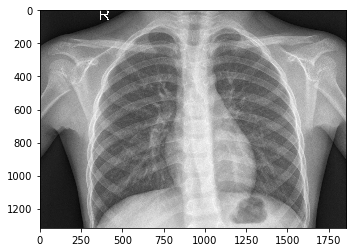

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

TRAIN_DATADIR = r"C:\Users\Rohit\Documents\pythonscripts\ML\Pneumonia\chest_xray\chest_xray\train"
CATEGORIES = ["NORMAL", "PNEUMONIA"]

for category in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [2]:
print(img_array)

[[ 0 32 33 ... 33 34  0]
 [ 0 33 33 ... 34 34  0]
 [ 1 33 33 ... 34 34  0]
 ...
 [ 0 28 28 ... 34 35  0]
 [ 0 29 28 ... 34 35  0]
 [ 0 29 29 ... 35 34  0]]


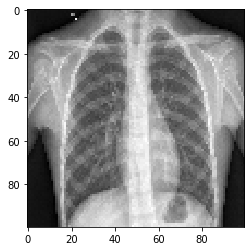

In [3]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception:
                pass
            
            
create_training_data()            

In [5]:
print(len(training_data))

5840


In [6]:
random.shuffle(training_data)

In [7]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [ ]:
print(X)

In [9]:
print(y)

[1 1 1 ... 1 1 1]


In [10]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()